<a href="https://colab.research.google.com/github/Ram2005-ui/us_accidents_data_analysis/blob/main/Day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Geospatial and Location-Based Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = '/content/drive/MyDrive/data/US_Accidents_March23.csv'
accident_df = pd.read_csv(dataset)
accident_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
# Convert coordinates to numeric (if not already)
accident_df['Start_Lat'] = pd.to_numeric(accident_df['Start_Lat'], errors='coerce')
accident_df['Start_Lng'] = pd.to_numeric(accident_df['Start_Lng'], errors='coerce')

# Drop rows with missing coordinates for geospatial analysis
geo_df = accident_df.dropna(subset=['Start_Lat', 'Start_Lng'])

# geo_df.head()
geo_df.shape


(7728394, 46)

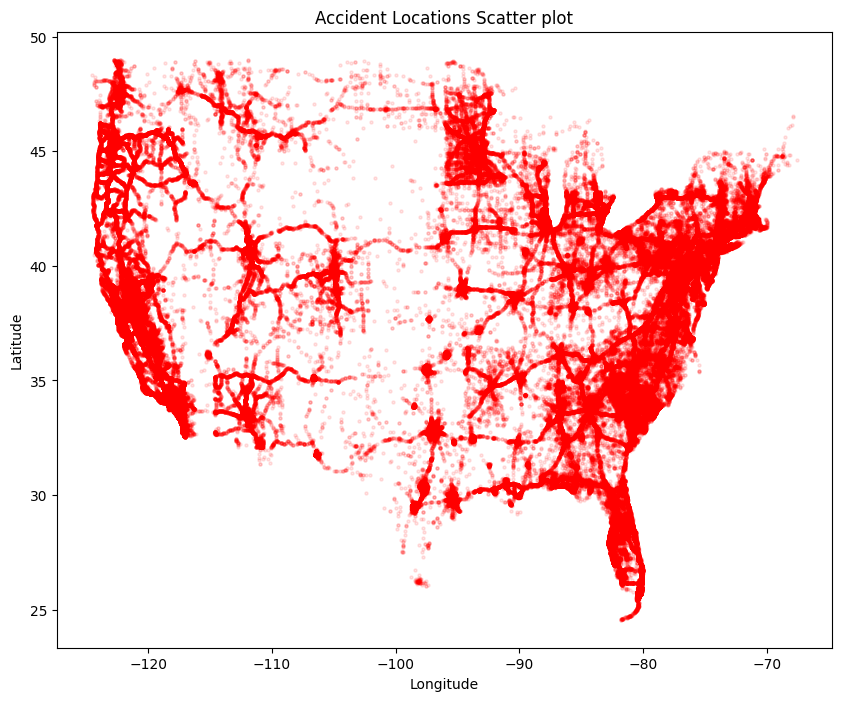

In [ ]:
# Visualize accident hotspots - scatter plot for all points(sample due to size)
plt.figure(figsize=(10, 8))
sample_df = geo_df.sample(n=1000000, random_state=42) # Sample for performance
plt.scatter(sample_df['Start_Lng'], sample_df['Start_Lat'], alpha=0.1, s=5, c='red')
plt.title('Accident Locations Scatter plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/tmp/ipython-input-4181917421.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis')


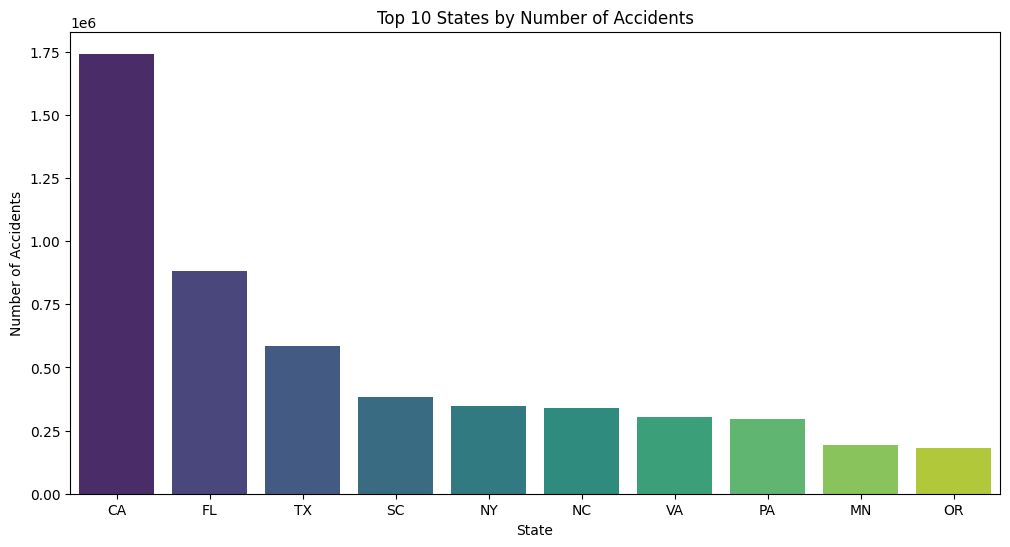

In [ ]:
# Density map by State (accident count per state)
state_counts = geo_df['State'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10], palette='viridis')
plt.title('Top 10 States by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('State')
plt.show()

/tmp/ipython-input-2887043176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')


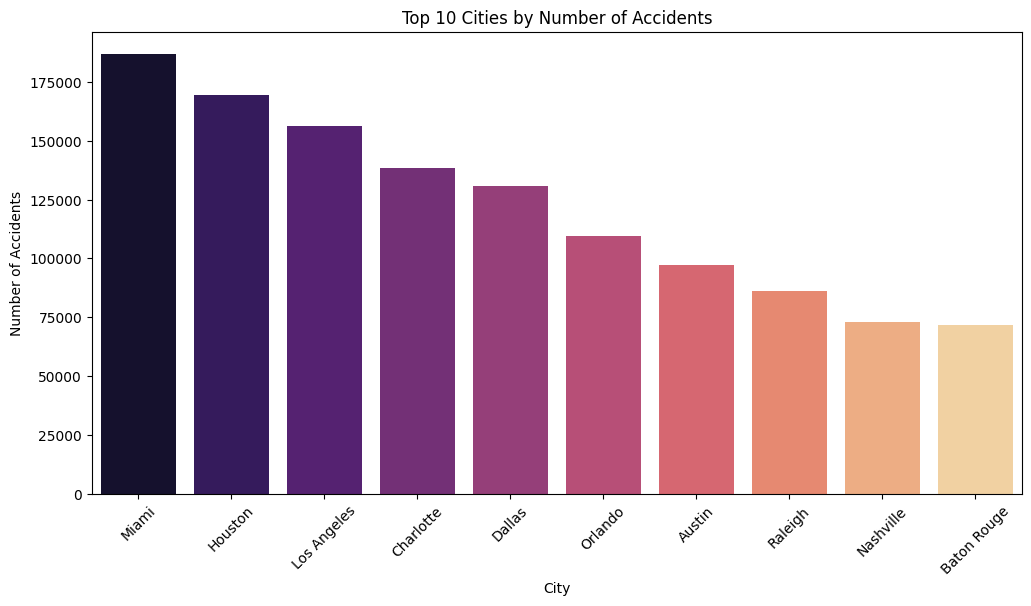

In [ ]:
# 3. Density map by City (accident count for top 10 cities)
city_counts = geo_df['City'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='magma')
plt.title('Top 10 Cities by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 4. Highlight top 5 most accident-prone states and cities
top_5_states = state_counts.head(5)
top_5_cities = city_counts.head(5)

print("Top 5 Accident-Prone States:")
print(top_5_states)

print("\nTop 5 Accident-Prone Cities:")
print(top_5_cities)


Top 5 Accident-Prone States:
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: count, dtype: int64

Top 5 Accident-Prone Cities:
City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Name: count, dtype: int64


### EDA Q/A

**Q1**. What is the distribution of accidents by Hour of the Day?

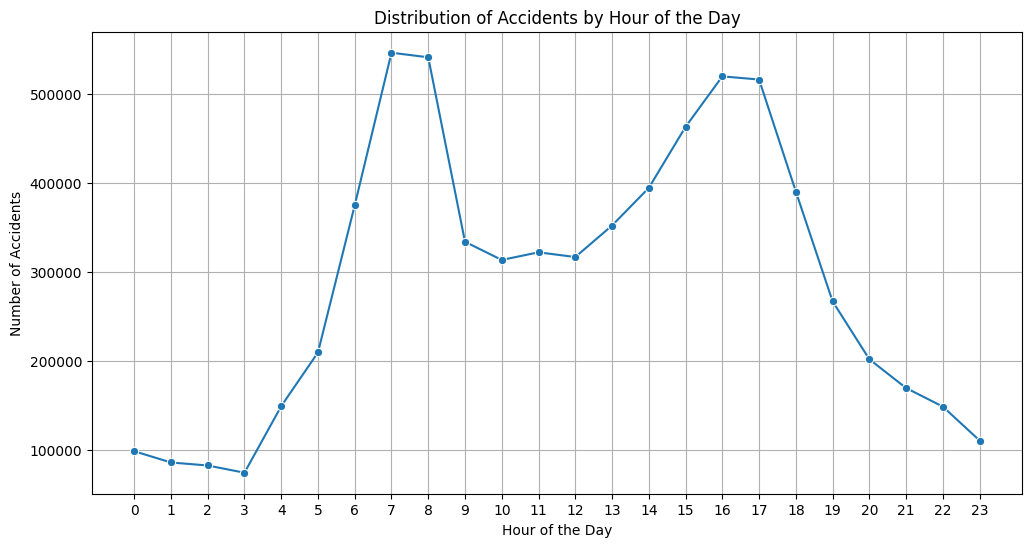

In [ ]:
# Convert 'Start_Time' to datetime if not already
accident_df['Start_Time'] = pd.to_datetime(accident_df['Start_Time'], errors='coerce')
# Extract hour from 'Start_Time'
accident_df['Hour'] = accident_df['Start_Time'].dt.hour
# Count accidents by hour
hourly_counts = accident_df['Hour'].value_counts().sort_index()
# Plot the distribution
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Distribution of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Q2**. How does accident severity distribute across different States?

<Figure size 1500x800 with 0 Axes>

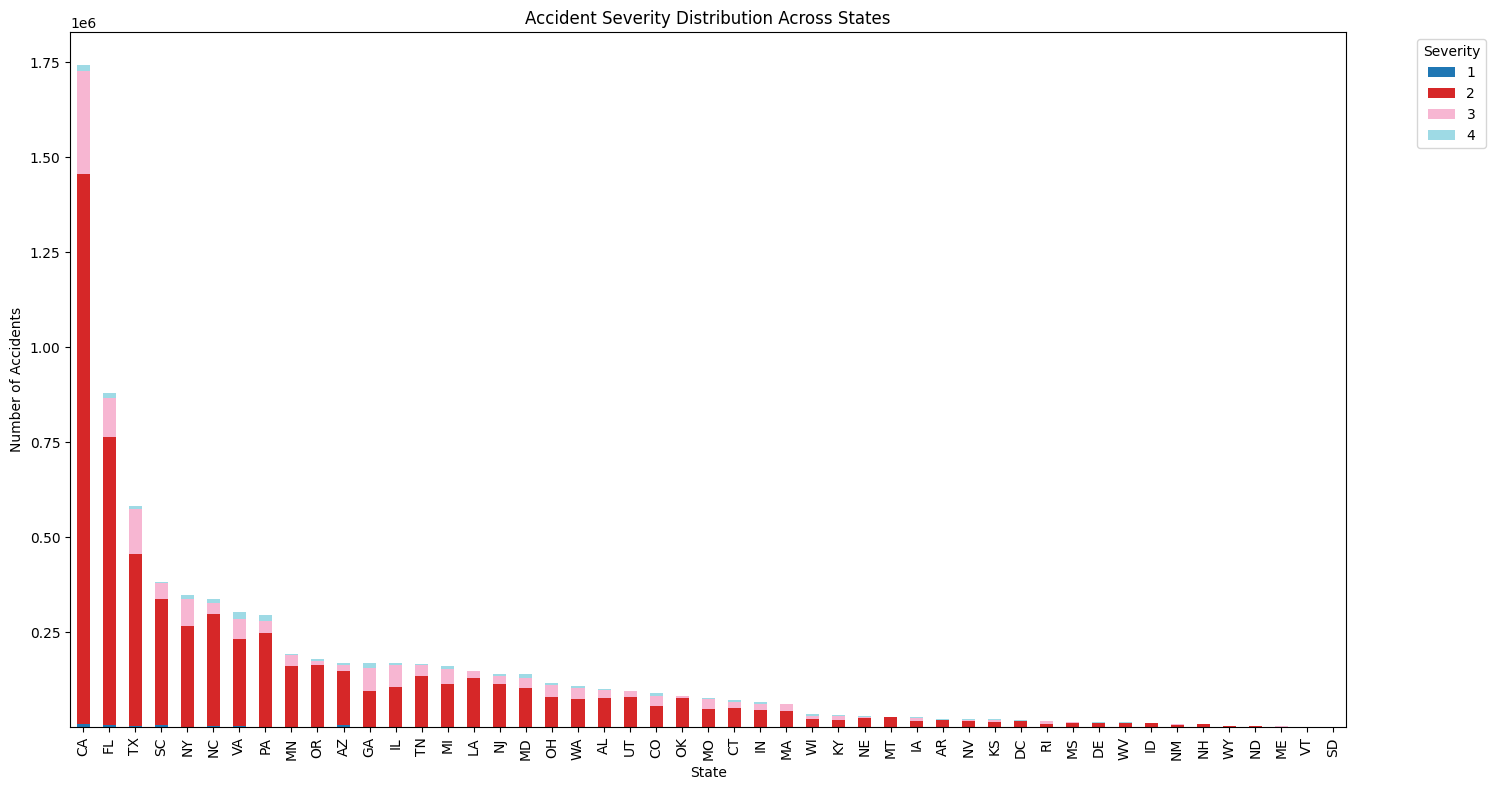

In [ ]:
# Count accidents by State and Severity
severity_state_counts = accident_df.groupby(['State', 'Severity']).size().unstack(fill_value=0)
# Plot the distribution
severity_state_counts = severity_state_counts.loc[severity_state_counts.sum(axis=1).sort_values(ascending=False).index]
plt.figure(figsize=(15, 8))
severity_state_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 8))
plt.title('Accident Severity Distribution Across States')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Q3**. What weather conditions are associated with the highest accident severity?

<Figure size 1500x800 with 0 Axes>

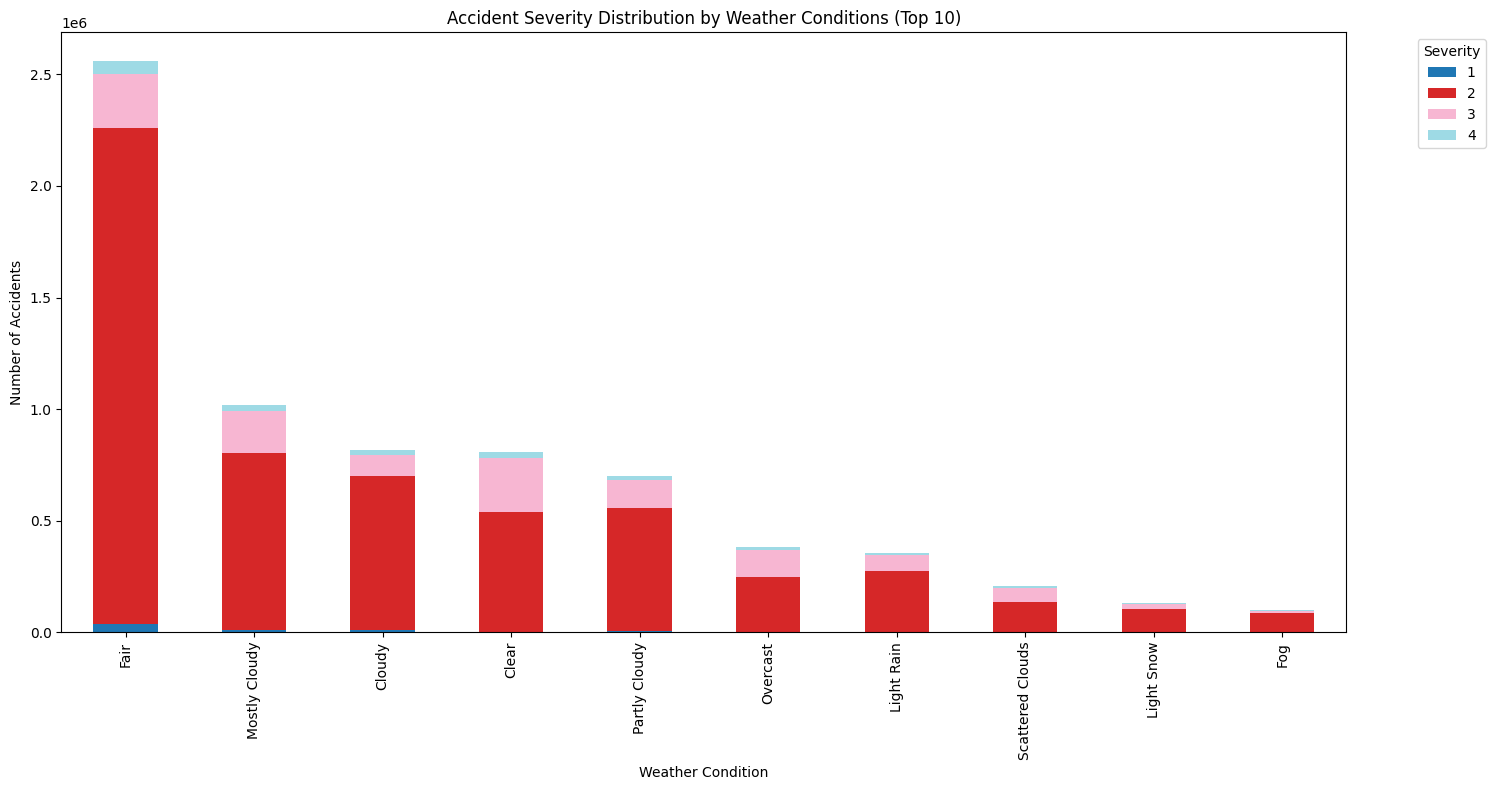

In [ ]:
# Count accidents by Weather_Condition and Severity
weather_severity_counts = accident_df.groupby(['Weather_Condition', 'Severity']).size().unstack(fill_value=0)
# Filter to top 10 weather conditions by total accidents
top_weather_conditions = weather_severity_counts.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_weather_severity = weather_severity_counts.loc[top_weather_conditions]
# Plot the distribution
plt.figure(figsize=(15, 8))
filtered_weather_severity.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 8))
plt.title('Accident Severity Distribution by Weather Conditions (Top 10)')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Q4**. How many accidents occur during day vs night? (Sunrise_Sunset column)

/tmp/ipython-input-1143859465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_night_counts.index, y=day_night_counts.values, palette='coolwarm')


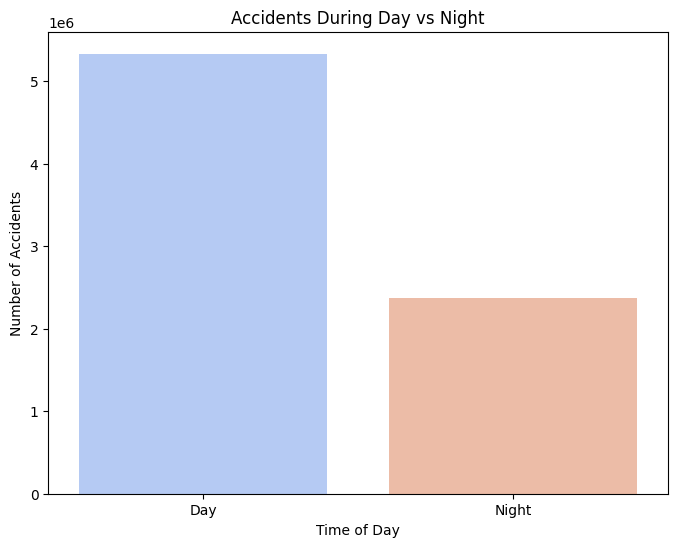

In [ ]:
# Count accidents by Sunrise_Sunset
day_night_counts = accident_df['Sunrise_Sunset'].value_counts()
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=day_night_counts.index, y=day_night_counts.values, palette='coolwarm')
plt.title('Accidents During Day vs Night')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

**Q5**. Distribution of accidents on different days of the week

/tmp/ipython-input-2769553518.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Set2')


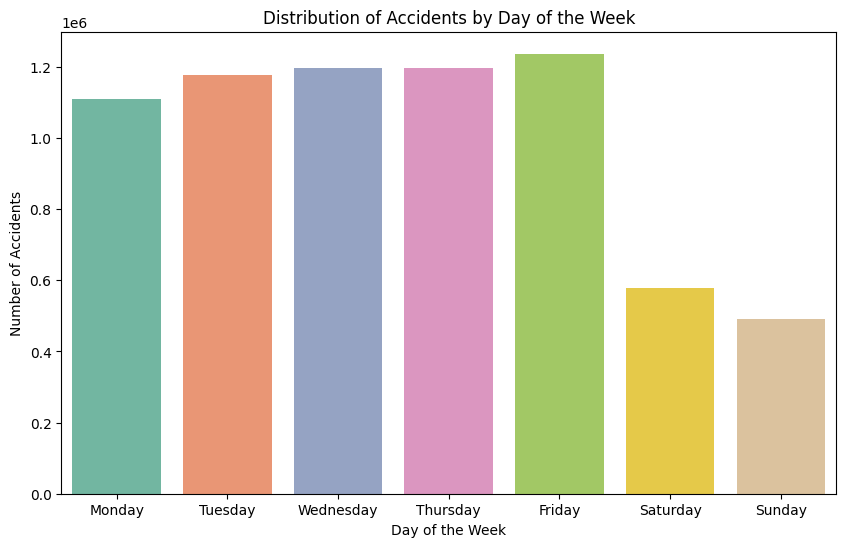

In [ ]:
# Extract day of the week from 'Start_Time'
accident_df['Day_of_Week'] = accident_df['Start_Time'].dt.day_name()
# Count accidents by Day_of_Week
day_of_week_counts = accident_df['Day_of_Week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Set2')
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

**Q6**. Are certain traffic features (e.g., Traffic Signal, Stop, Crossing) associated with accident counts?

/tmp/ipython-input-3987875166.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


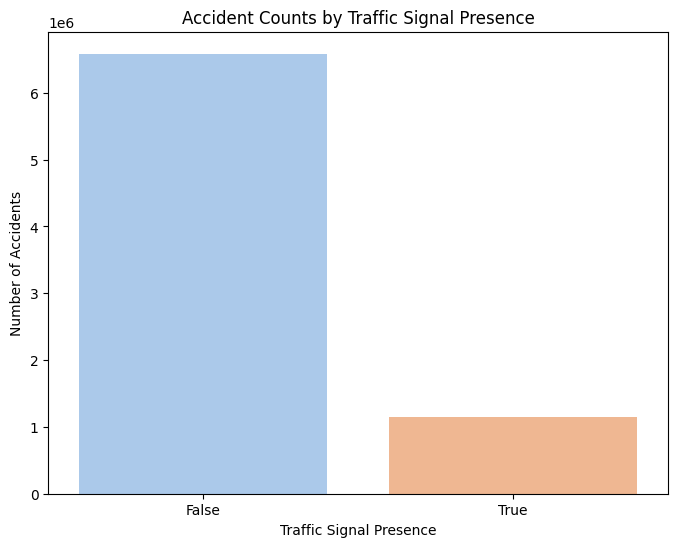

/tmp/ipython-input-3987875166.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


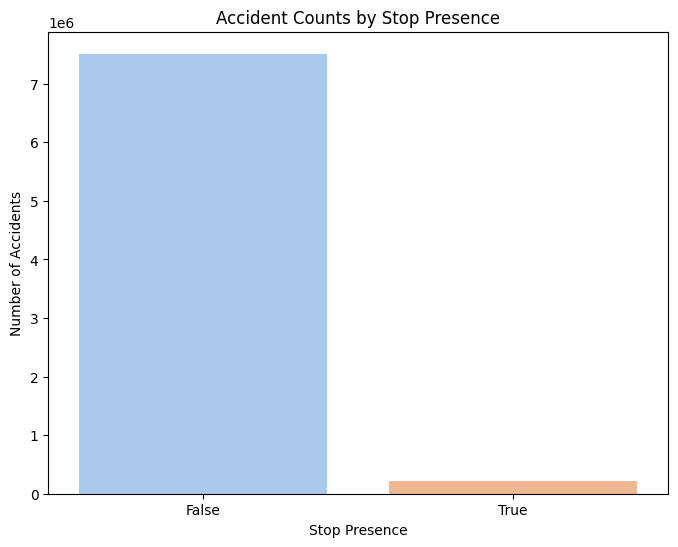

/tmp/ipython-input-3987875166.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


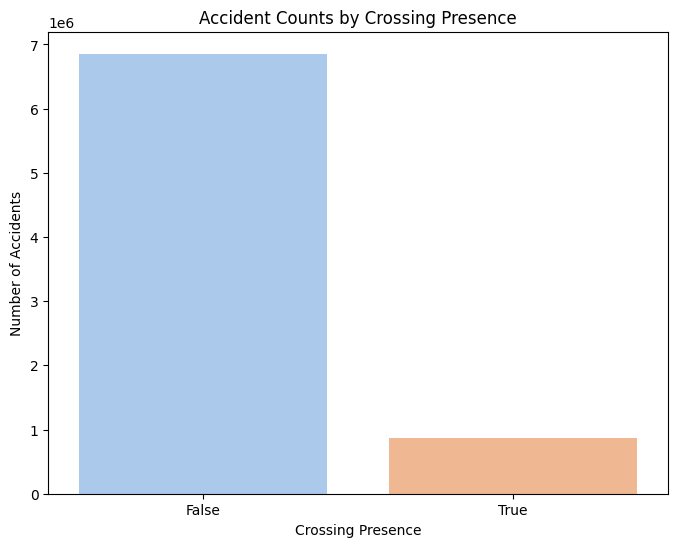

In [ ]:
# Count accidents by Traffic Control devices
traffic_features = ['Traffic_Signal', 'Stop', 'Crossing']
traffic_feature_counts = {feature: accident_df[feature].value_counts() for feature in traffic_features}
# Plot the distributions
for feature, counts in traffic_feature_counts.items():
    plt.figure(figsize=(8, 6))
    sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')
    plt.title(f'Accident Counts by {feature.replace("_", " ")} Presence')
    plt.xlabel(f'{feature.replace("_", " ")} Presence')
    plt.ylabel('Number of Accidents')
    plt.show()